What if instead of testing each and everyone, we could take clusters of people
and test them all together.
https://hackaday.com/2020/03/24/coronavirus-testing-just-the-facts/

Since we know log search is log(n) efficient, I assume that the amount of needed tests
to:
1. see if there is sick people in a population
2. identify who is
would be less than ammount

we take a few (~10) swabs from each person
so we take all the spit(yuck!) and put it into pcr and see if something grows.
if it does, we take the next test swab from the person in the cluster divide the problem, put all the yuck together and test.

so far results:
1. for ~19% of pop sick from total there will be some effeciency to the method with ammount of tests < pop size
2. the efficiency is max at 2 tests for the whole POP SIZE and drops down if sick percentage is higher
3. the boost can make 1000 tests into 1500 thus giving a nice ability ramp up

In [200]:
import numpy as np
import matplotlib.pyplot as plt

POP_SIZE = 10**3
CHANCE_OF_CONTAGION = 0.03
population = np.zeros(POP_SIZE)

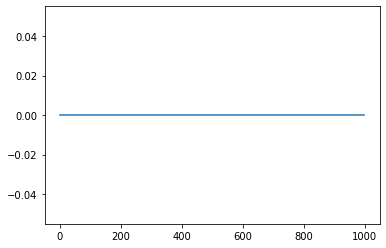

In [201]:
plt.plot(population)
plt.show()

In [202]:
chances_of_exposure = np.random.rand(POP_SIZE)

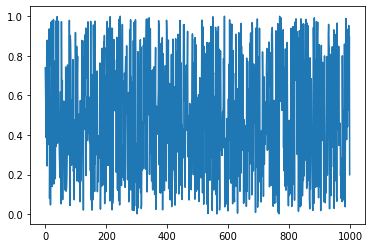

In [203]:
plt.plot(chances_of_exposure)
plt.show()

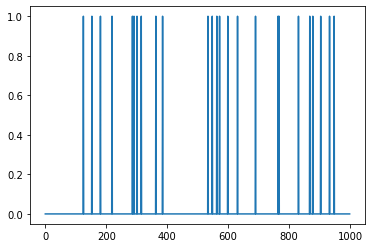

25
[125 153 181 219 286 291 301 315 363 385 534 548 563 572 599 631 690 764
 767 831 868 878 904 933 948]


In [204]:
sick_pop = chances_of_exposure<CHANCE_OF_CONTAGION
plt.plot(sick_pop)
plt.show()
print(np.sum(sick_pop))
ids_real = np.where(sick_pop==1)[0]
print(ids_real)

In [205]:
global test
global ids
import logging


def find_and_isolate_sick(arr,start,end):
    global test
    global ids
    
    left = False
    right = False
    
    mid = (end + start)//2
    # print("start: {}, mid {}, end {}".format(start,mid,end))
    if (end - start)>2:

        
        # check left side
        if (mid + 1 -start) > 1:
            test = test + 1
            if np.sum(arr[start:mid])>0:
                #print("Sick at left side")
                left = True
            else:
                #print("No sick at left side")
                pass
        else:
            ids.append(mid)
            #print("case 2: found one at {}".format(mid))

        
        # check right side      
        if (end - mid) > 1:
            test = test + 1
            if np.sum(arr[mid:end])>0:
                #print("Sick at right side")
                right = True
            else:
                #print("No sick at right side")
                pass
        else:
            ids.append(mid+1)
            #print("case 2: found one at {}".format(mid+1))
        
        if(left):
            find_and_isolate_sick(arr,start,mid)
        if(right):
            find_and_isolate_sick(arr,mid,end)
    else:
        if (end - start == 2):
            if (arr[start]):
                #print("found one at {}".format(start))
                ids.append(start)
                test = test + 1

            if (arr[end]):
                #print("found one at {}".format(end))
                ids.append(end)
                test = test + 1

            if (arr[start+1]):
                #print("found one at {}".format(start+1))
                ids.append(start+1)
                test = test + 1
        elif(end - start == 1):
            if (arr[start]):
                #print("found one at {}".format(start))
                ids.append(start)
                test = test + 1

            if (arr[end]):
                #print("found one at {}".format(end))
                ids.append(end)
                test = test + 1
        elif(end - start == 0):
            if (arr[end]):
                #print("found one at {}".format(end))
                ids.append(end)
                test = test + 1
    


In [206]:
test = 0
ids = []

find_and_isolate_sick(sick_pop,0,len(sick_pop)-1)

ids = np.array(ids)

In [207]:
print(ids)
print(len(ids))
print(ids_real)
print(len(ids_real))

print(test)


[125 153 181 219 286 291 301 315 363 385 534 548 563 572 599 631 690 764
 767 831 868 878 904 933 948]
25
[125 153 181 219 286 291 301 315 363 385 534 548 563 572 599 631 690 764
 767 831 868 878 904 933 948]
25
255


In [208]:
print(sick_pop[7:10])
print(sick_pop[9:3])

[False False False]
[]


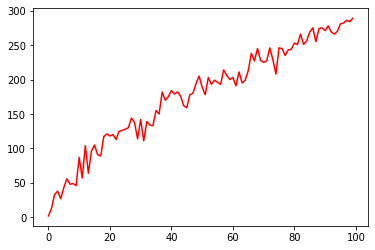

12


In [253]:
POP_SIZE = 10**2
CHANCE_OF_CONTAGION = 0.03
population = np.zeros(POP_SIZE)
tests = []

for chance in range(100):
    chances_of_exposure = np.random.rand(POP_SIZE)
    sick_pop = chances_of_exposure<chance/100
    test = 0
    ids = []

    find_and_isolate_sick(sick_pop,0,len(sick_pop)-1)

    ids = np.array(ids)
    tests.append(test)

tests = np.array(tests)
chace_arr = np.arange(100)
plt.plot(chace_arr, tests, '-r')
plt.show()

try:
    print(np.min(np.where(tests>POP_SIZE)))
except ValueError:
    print("Under")

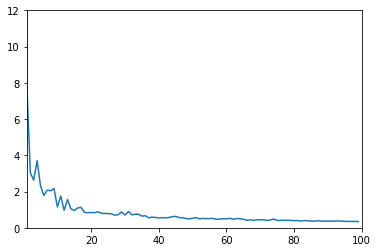

In [254]:
plt.plot(chace_arr, POP_SIZE/tests)
plt.xlim([1,100])
plt.ylim([0,12])
plt.show()

In [255]:
print(tests)
print(POP_SIZE/tests)

[  2  13  33  38  27  43  56  48  49  46  87  57 104  64  96 105  91  89
 117 121 118 120 113 125 126 128 130 144 138 114 142 111 139 134 133 155
 150 182 170 175 184 179 182 176 162 159 178 180 194 205 189 178 203 193
 199 196 193 214 206 200 203 191 211 195 199 213 238 227 245 228 225 227
 246 229 208 246 245 235 243 244 253 251 266 251 256 269 275 255 274 275
 271 278 269 266 270 281 282 286 284 289]
[50.          7.69230769  3.03030303  2.63157895  3.7037037   2.3255814
  1.78571429  2.08333333  2.04081633  2.17391304  1.14942529  1.75438596
  0.96153846  1.5625      1.04166667  0.95238095  1.0989011   1.12359551
  0.85470085  0.82644628  0.84745763  0.83333333  0.88495575  0.8
  0.79365079  0.78125     0.76923077  0.69444444  0.72463768  0.87719298
  0.70422535  0.9009009   0.71942446  0.74626866  0.7518797   0.64516129
  0.66666667  0.54945055  0.58823529  0.57142857  0.54347826  0.55865922
  0.54945055  0.56818182  0.61728395  0.62893082  0.56179775  0.55555556
  0.51546392  0.4